<a href="https://colab.research.google.com/github/Anik-Adnan/Python-Libraries-NumPy-Matplotlib-and-Pandas/blob/main/Django_ScuPi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hi")

Hi


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

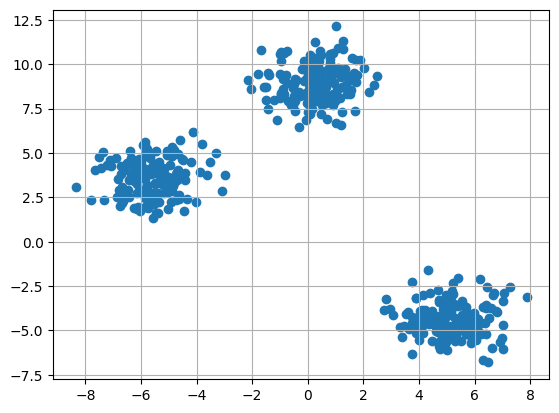

In [ ]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [ ]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

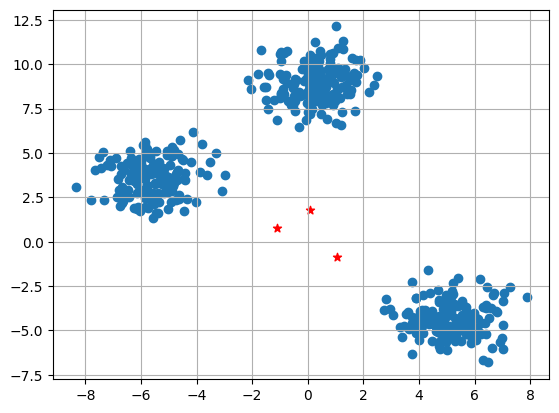

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


In [ ]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [ ]:
#Implementing E step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters


In [ ]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred


In [ ]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

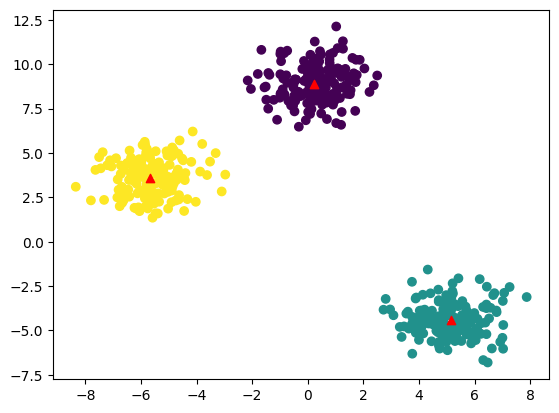

In [ ]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

In [ ]:
#example 2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X, y = load_iris(return_X_y=True)

In [ ]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)


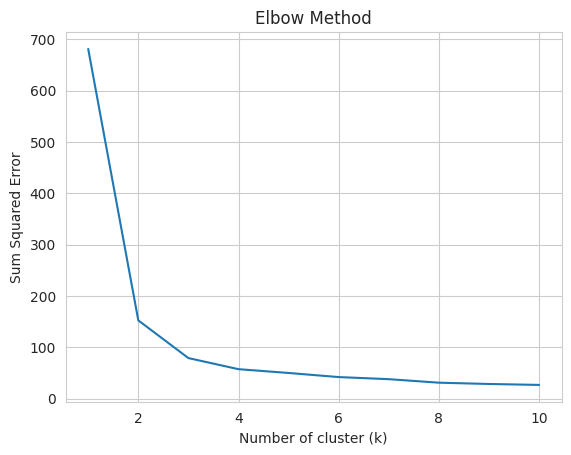

In [ ]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()


In [ ]:
# Pandas example


**Pandas**

In [ ]:
import pandas as pd

data = {'Grade': ['A+', 'A', 'A-','B','C','D','E','F'],
        'Marks': [80, 75, 70,65,60,50,40,33],
      }
df = pd.DataFrame(data)
print(df)


  Grade  Marks
0    A+     80
1     A     75
2    A-     70
3     B     65
4     C     60
5     D     50
6     E     40
7     F     33


In [ ]:
print(df.head(1))  # First row


  Grade  Marks
0    A+     80


In [ ]:
print(df.tail(1))  # Last row


  Grade  Marks
7     F     33


In [ ]:
print(df['Grade'])  # Select 'Name' column

0    A+
1     A
2    A-
3     B
4     C
5     D
6     E
7     F
Name: Grade, dtype: object


In [ ]:
print(df['Marks'])

0    80
1    75
2    70
3    65
4    60
5    50
6    40
7    33
Name: Marks, dtype: int64


In [ ]:
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'Score': [85.5, 90.0, 88.0]}
df = pd.DataFrame(data)
print(df)


      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   90.0
2  Charlie   35   88.0


In [ ]:
print(df[df['Age'] > 25])  # Rows where 'Age' > 25

      Name  Age  Score
1      Bob   30   90.0
2  Charlie   35   88.0


In [ ]:
# ADD column

In [ ]:
df['Grade'] = ['A', 'A+', 'B']
print(df)


      Name  Age  Score Grade
0    Alice   25   85.5     A
1      Bob   30   90.0    A+
2  Charlie   35   88.0     B


In [ ]:
# Short values
print(df.sort_values(by='Score', ascending=False))


      Name  Age  Score Grade
1      Bob   30   90.0    A+
2  Charlie   35   88.0     B
0    Alice   25   85.5     A


In [ ]:
#  Group By and Aggregate
grouped = df.groupby('Age').agg({'Score': 'mean'})
print(grouped)


     Score
Age       
25    85.5
30    90.0
35    88.0


In [ ]:
# Fill Missing Values python Copy code
df.loc[1, 'Score'] = None
print(df.fillna(0))  # Replace NaN with 0



      Name  Age  Score Grade
0    Alice   25   85.5     A
1      Bob   30    0.0    A+
2  Charlie   35   88.0     B


In [ ]:
# Rename Columns
df.rename(columns={'Name': 'StudentName'}, inplace=True)
print(df)


  StudentName  Age  Score Grade
0       Alice   25   85.5     A
1         Bob   30    NaN    A+
2     Charlie   35   88.0     B


In [ ]:
# Apply Function
df['Score'] = df['Score'].apply(lambda x: x * 2 if x else 0)
print(df)


  StudentName  Age  Score Grade
0       Alice   25  171.0     A
1         Bob   30    NaN    A+
2     Charlie   35  176.0     B


In [ ]:
# Iterate Over Rows python Copy code
for index, row in df.iterrows():
    print(row['StudentName'], row['Score'])



Alice 171.0
Bob nan
Charlie 176.0


In [ ]:
# Merge DataFrames
df2 = pd.DataFrame({'StudentName': ['Alice', 'Bob'], 'City': ['NY', 'LA']})
merged = pd.merge(df, df2, on='StudentName', how='inner')
print(merged)


  StudentName  Age  Score Grade City
0       Alice   25  171.0     A   NY
1         Bob   30    NaN    A+   LA


In [ ]:
# prompt: splitting pandas dataframe

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/EDGEICT/refs/heads/main/HistoricalPrices.csv')

#rename columns name to remove white spaces at the beginning or end
df = df.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})

print(df)

        Date      Open      High       Low     Close
0   11/15/24  43587.93  43647.53  43350.43  43444.99
1   11/14/24  44032.38  44080.78  43704.82  43750.86
2   11/13/24  43880.46  44141.33  43829.98  43958.19
3   11/12/24  44359.21  44405.73  43887.27  43910.98
4   11/11/24  44057.65  44486.70  44057.65  44293.13
..       ...       ...       ...       ...       ...
59  08/23/24  40879.12  41207.92  40842.96  41175.08
60  08/22/24  40932.23  41026.64  40584.47  40712.78
61  08/21/24  40881.03  40974.40  40738.43  40890.49
62  08/20/24  40874.52  40909.38  40756.65  40834.97
63  08/19/24  40670.83  40907.32  40670.83  40896.53

[64 rows x 5 columns]


In [ ]:
meanValue = df['High'].mean()
df[(df['High'] > df['High'].mean()-20000) & (df['High'] < df['High'].mean())]


,Date,Open,High,Low,Close
8,11/05/24,41835.49,42258.84,41766.96,42221.88
9,11/04/24,42004.66,42035.87,41647.30,41794.60
11,10/31/24,41956.34,41991.91,41704.63,41763.46
28,10/08/24,42022.65,42128.56,41874.72,42080.37
31,10/03/24,42099.53,42125.84,41847.81,42011.59
32,10/02/24,42125.14,42259.52,41968.79,42196.52
36,09/26/24,42113.42,42224.15,42036.28,42175.11
38,09/24/24,42234.99,42281.06,42056.82,42208.22
39,09/23/24,42060.40,42190.05,42012.22,42124.65
40,09/20/24,41959.43,42138.41,41865.95,42063.36


42258.84
42035.87
41991.91
42128.56
42125.84
42259.52
42224.15
42281.06
42190.05
42138.41
42160.91
41981.97
41835.28
41733.97
41533.84
41107.35
40903.68
40916.5
41000.24
41009.39
41084.78
41172.59
41489.67
41585.21
41577.97
41351.11
41271.75
41420.05
41207.92
41026.64
40974.4
40909.38
40907.32


<Axes: >

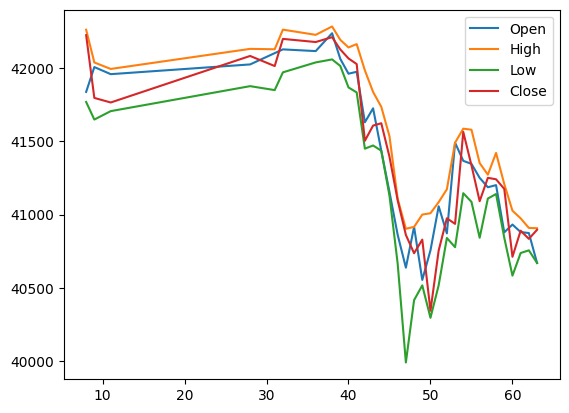

In [ ]:
import matplotlib as plt
df[df['High']> df['High'].mean()]
mean= df['High'].mean()
new_list =[]
for index,data in df.iterrows():
  high= data['High']
  if(mean-10000 <high < mean):
    new_list.append(data)
    print(high)

df= pd.DataFrame(new_list)
df.plot()


# New Section

<Axes: >

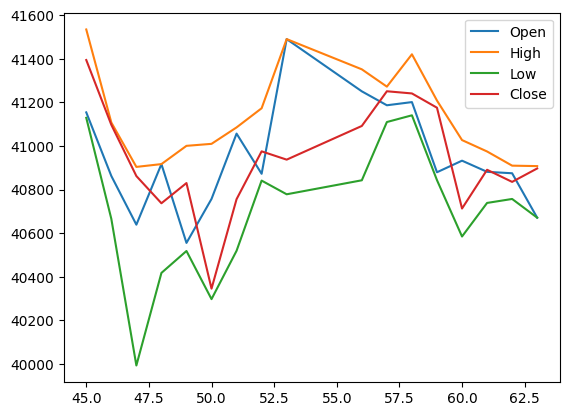

In [ ]:
df[(df['High'] > df['High'].mean()-20000) & (df['High'] < df['High'].mean())].plot()


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

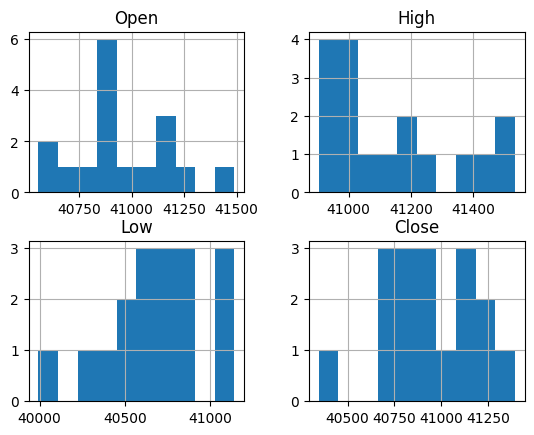

In [ ]:
df[(df['High'] > df['High'].mean()-20000) & (df['High'] < df['High'].mean())].hist()


**Matplotlib**

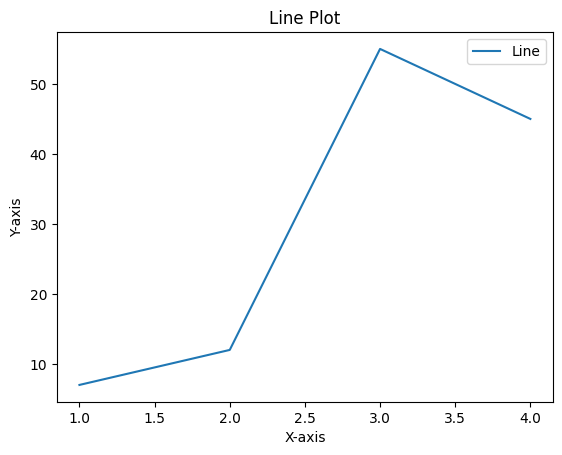

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [7, 12, 55, 45]

plt.plot(x, y, label='Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot')
plt.legend()
plt.show()


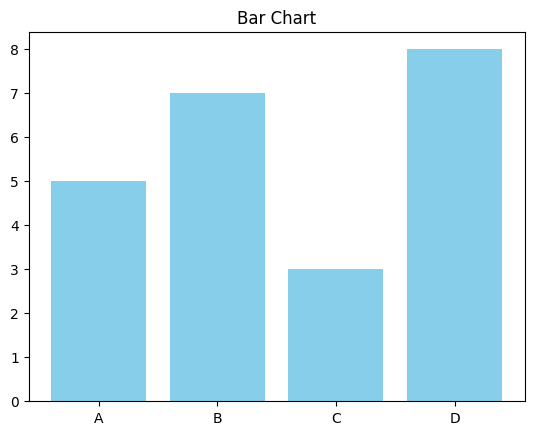

In [ ]:
x = ['A', 'B', 'C', 'D']
y = [5, 7, 3, 8]

plt.bar(x, y, color='skyblue')
plt.title('Bar Chart')
plt.show()


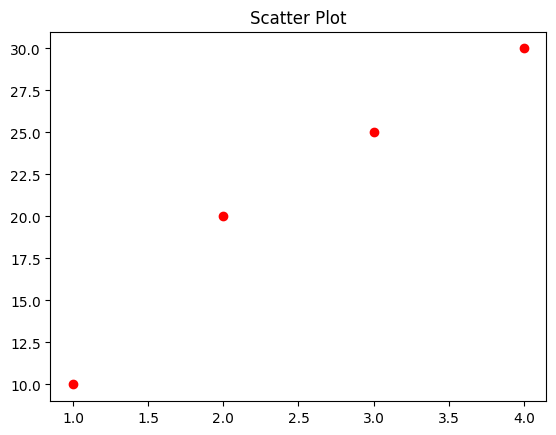

In [ ]:
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

plt.scatter(x, y, color='red')
plt.title('Scatter Plot')
plt.show()


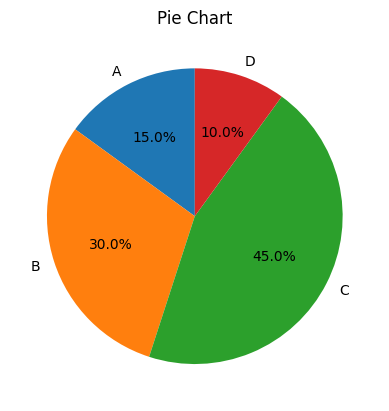

In [ ]:
labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart')
plt.show()


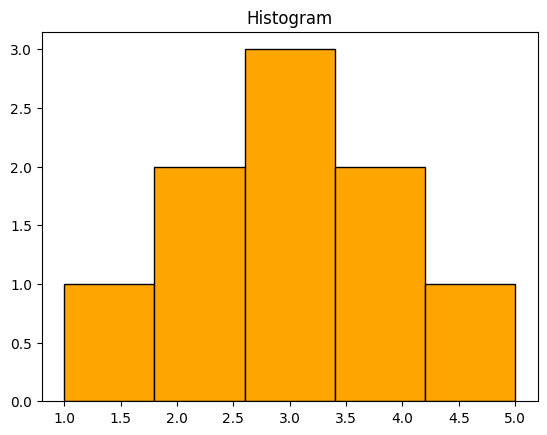

In [ ]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 5]

plt.hist(data, bins=5, color='orange', edgecolor='black')
plt.title('Histogram')
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

data = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [10, 20, 25, 30]})
fig = px.line(data, x='x', y='y', title='Line Plot')
fig.show()


In [ ]:
data = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [10, 20, 25, 30]})
fig = px.scatter(data, x='x', y='y', title='Scatter Plot', color='y')
fig.show()


In [ ]:
data = pd.DataFrame({'Category': ['A', 'B', 'C', 'D'], 'Values': [5, 7, 3, 8]})
fig = px.bar(data, x='Category', y='Values', title='Bar Chart')
fig.show()


In [ ]:
data = pd.DataFrame({'Values': [1, 2, 2, 3, 3, 3, 4, 4, 5]})
fig = px.histogram(data, x='Values', nbins=5, title='Histogram')
fig.show()


In [ ]:
data = pd.DataFrame({'Labels': ['A', 'B', 'C', 'D'], 'Values': [15, 30, 45, 10]})
fig = px.pie(data, names='Labels', values='Values', title='Pie Chart')
fig.show()


In [ ]:
data = pd.DataFrame({'Category': ['A', 'A', 'B', 'B'], 'Values': [10, 20, 15, 25]})
fig = px.box(data, x='Category', y='Values', title='Box Plot')
fig.show()


In [ ]:
data = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [10, 20, 25, 30], 'z': [5, 10, 15, 20]})
fig = px.density_heatmap(data, x='x', y='y', z='z', title='Density Heatmap')
fig.show()


In [ ]:
data = pd.DataFrame({
    'x': [1, 2, 3, 4] * 2,
    'y': [10, 20, 25, 30, 15, 25, 35, 45],
    'time': [1, 1, 1, 1, 2, 2, 2, 2]
})
fig = px.scatter(data, x='x', y='y', animation_frame='time', title='Animated Scatter Plot')
fig.show()


In [ ]:
set1 = {1, 2, 3, 4}
set2 = {3, 4, 5, 6}
result = set1 & set2
print(result)

{3, 4}


In [ ]:
t = (1, 2, [3, 4])
t[2][1] = 5
print(t)


(1, 2, [3, 5])


In [ ]:
data = {"x": 10, "y": 20, "z": 30}
data["y"] = data["x"] + data["z"]
print(data)

{'x': 10, 'y': 40, 'z': 30}


In [ ]:
def func(x, lst=[]):
    lst.append(x)
    return lst

print(func(1))
print(func(2))

[1]
[1, 2]


In [ ]:
class MyClass:
    count = 0

    def __init__(self):
        MyClass.count += 1

obj1 = MyClass()
obj2 = MyClass()
print(MyClass.count)

2


In [ ]:
import numpy as np

arr = np.array([1, 2, 3, 4])

print(arr * 2)

[2 4 6 8]


In [ ]:
import pandas as pd
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
print(df.loc[1, "B"])

5


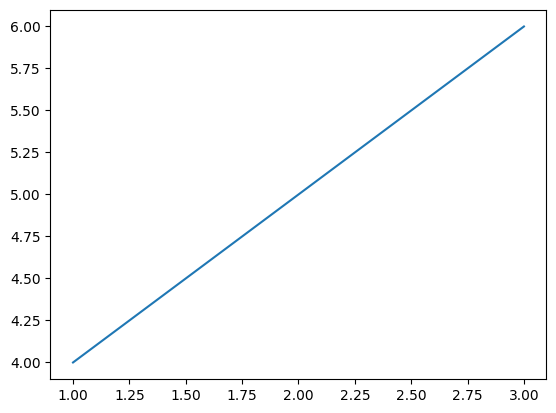

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

NameError: name 'X' is not defined

In [ ]:
import numpy as np
arr = np.array([[1, 2], [3, 4]])
print(arr.sum(axis=0))

[4 6]


In [ ]:
string = "Python"
print(string[1:4])

yth


In [ ]:
for i in range(1, 6):
    print(i * "*")

*
**
***
****
*****


In [ ]:
x = 5 / 2
print(type(x))

<class 'float'>
